In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = sns.load_dataset("titanic")

In [98]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Data Preprocessing

In [99]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [100]:
df.duplicated().sum()

107

In [101]:
df.shape

(891, 15)

In [102]:
df.drop_duplicates(inplace=True)

In [103]:
df.duplicated().sum()

0

<Axes: xlabel='pclass', ylabel='age'>

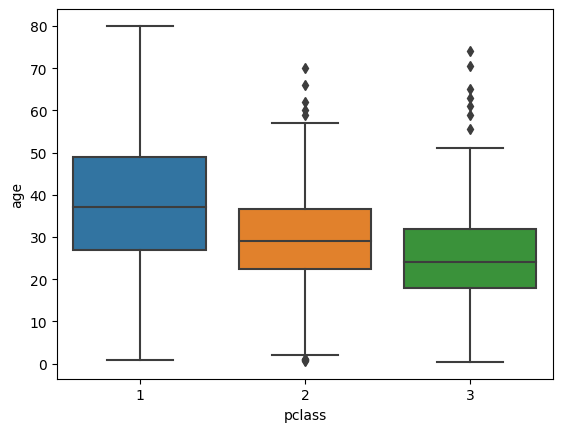

In [104]:
sns.boxplot(x=df["pclass"], y=df["age"])

In [105]:
def imputation(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 23
    else:
        return age

df["age"] = df[["age","pclass"]].apply(imputation, axis=1)

In [106]:
df.drop(columns=["class","who","adult_male","deck","sibsp","parch","embark_town","alive","alone"], inplace=True)

In [107]:
df["embarked"].mode()[0]

'S'

In [108]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [109]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

In [110]:
df.head(4)

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S


# Train Test Split

In [111]:
from sklearn.model_selection import train_test_split

x = df.drop("survived", axis=1)
y = df["survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [112]:
len(x_train)

627

In [113]:
len(x_test)

157

In [114]:
len(df)

784

In [115]:
x

,pclass,sex,age,fare,embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
885,3,female,39.0,29.1250,Q
887,1,female,19.0,30.0000,S
888,3,female,23.0,23.4500,S
889,1,male,26.0,30.0000,C


In [116]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: survived, Length: 784, dtype: int64

# Column Transformers

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [123]:
c_1 = ColumnTransformer(transformers=[
    ("one-hot encoder", OneHotEncoder(sparse_output=False), [1,4])
])

In [124]:
c_2 = ColumnTransformer(transformers=[
    ("min-max scaler", MinMaxScaler(), slice(0,None))
])

# GaussianNB model

In [125]:
from sklearn.naive_bayes import GaussianNB

c_3 = GaussianNB()

In [126]:
from sklearn.pipeline import Pipeline

pipe_line = Pipeline([
    ("one", c_1),
    ("two", c_2),
    ("three", c_3)
])

In [127]:
pipe_line.fit(x_train, y_train)

Pipeline(steps=[('one',
                 ColumnTransformer(transformers=[('one-hot encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 4])])),
                ('two',
                 ColumnTransformer(transformers=[('min-max scaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('three', GaussianNB())])

In [128]:
pred = pipe_line.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Naive Bayes: ", accuracy_score(pred, y_test))

Accuracy Score of Naive Bayes:  0.7707006369426752


# Try for Logistic Regression Algorithm

In [130]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [131]:
pipe_line2 = Pipeline([
    ("one", c_1),
    ("two", c_2),
    ("three", lr)
])

In [132]:
pipe_line2.fit(x_train, y_train)

Pipeline(steps=[('one',
                 ColumnTransformer(transformers=[('one-hot encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 4])])),
                ('two',
                 ColumnTransformer(transformers=[('min-max scaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('three', LogisticRegression())])

In [133]:
pred2 = pipe_line2.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Logistic Regression: ", accuracy_score(pred2, y_test))

Accuracy Score of Logistic Regression:  0.7707006369426752


# Try for SVM

In [163]:
from sklearn.svm import SVC

svc = SVC(C=3, kernel="poly", degree=1)

In [164]:
pipe_line3 = Pipeline([
    ("one", c_1),
    ("two", c_2),
    ("three", svc)
])

In [165]:
pipe_line3.fit(x_train, y_train)

Pipeline(steps=[('one',
                 ColumnTransformer(transformers=[('one-hot encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 4])])),
                ('two',
                 ColumnTransformer(transformers=[('min-max scaler',
                                                  MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('three', SVC(C=3, degree=1, kernel='poly'))])

In [166]:
pred3 = pipe_line3.predict(x_test)

In [167]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Support Vector Machine: ", accuracy_score(pred3, y_test))

Accuracy Score of Support Vector Machine:  0.7707006369426752
